## UnSupervised Learning

In [3]:
# Unsupervised learning is a type of machine learning in which models 
# are trained using unlabeled dataset and are allowed to act on that 
# data without any supervision.

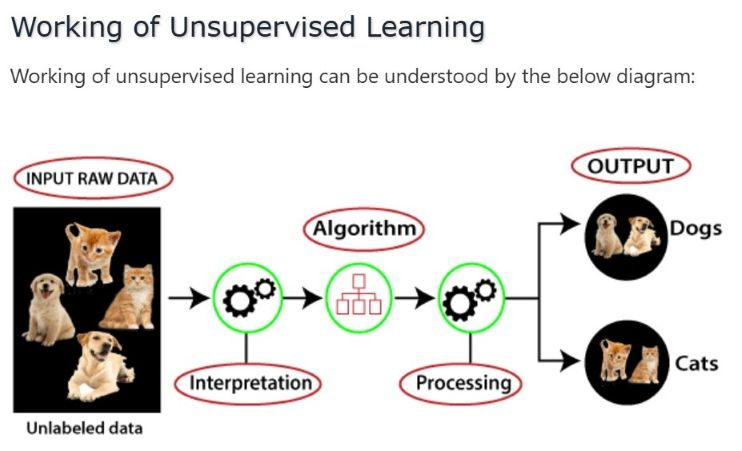

## K-Means Clustering Algorithm

In [5]:
# K-Means Clustering is an Unsupervised Learning algorithm, 
# which groups the unlabeled dataset into different clusters. 
# Here K defines the number of pre-defined clusters that need to be 
# created in the process, as if K=2, there will be two clusters, 
# and for K=3, there will be three clusters, and so on.

### Step-1: Data pre-processing Step

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
dataset = pd.read_csv('Datasets/Mall_Customers.csv')

In [11]:
dataset.head(8)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


In [12]:
dataset.shape

(200, 5)

In [ ]:
# As there are no labels and feautures, 
# We need to perform clustering, it will group similar type of dataset

In [15]:
x = dataset.iloc[ : , [3,4]].values

In [17]:
# Next step is to guess how many clusters

### Step-2: Finding the optimal number of clusters using the elbow method

In [20]:
# finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans

In [21]:
# WCSS stands for Within Cluster Sum of Squares
# Its a Mathematics method to apply 'Elbow Method'
# The Elbow method is one of the most popular ways to find the optimal number of clusters.

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

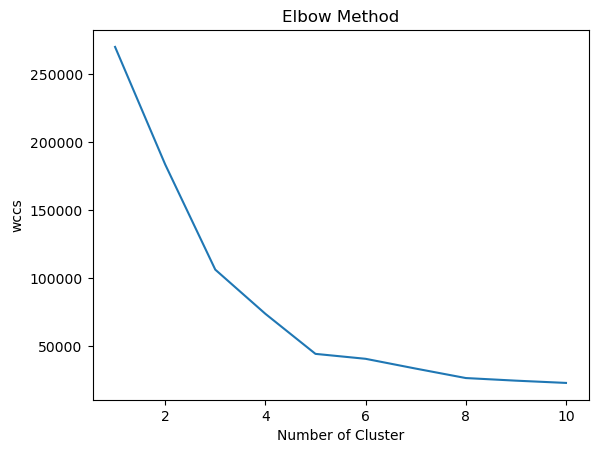

In [26]:

wccs = [] #Initializing the list for the values of WCSS 

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wccs.append(kmeans.inertia_)

plt.plot(range(1,11), wccs)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('wccs')
plt.show()

In [28]:
# From the above plot, we can see the elbow point is at 5. 
# So the number of clusters here will be 5.

### Step- 3: Training the K-means algorithm on the training dataset

In [29]:
# As we have got the number of clusters, so we can now train the model on the dataset.

In [30]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

### Step-4: Visualizing the Clusters

In [33]:
# The last step is to visualize the clusters. As we have 5 clusters for our model, 
# so we will visualize each cluster one by one.

In [35]:
x[0]

array([15, 39], dtype=int64)

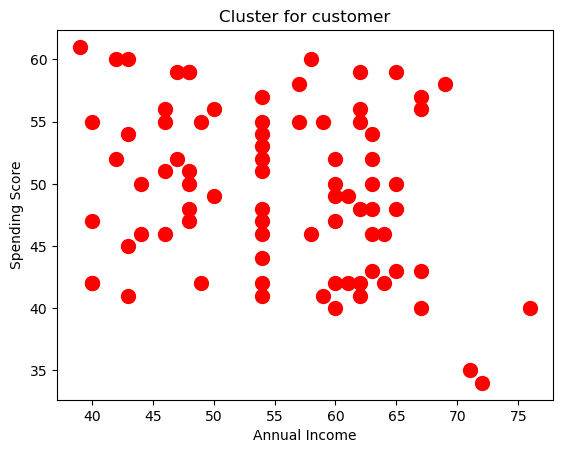

In [41]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='red', label='cluster 1')
plt.title('Cluster for customer')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [38]:
# Now we will do for all the 5 clusters

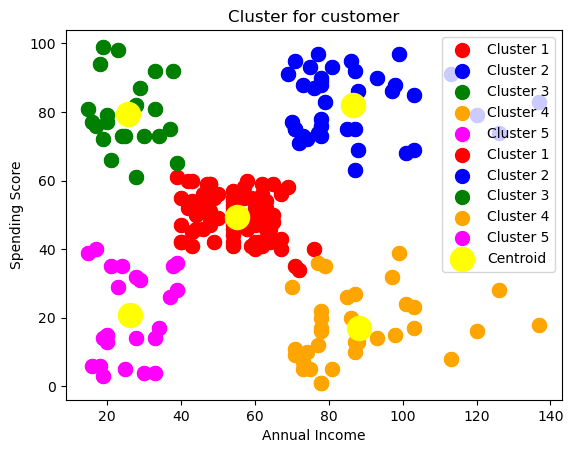

In [50]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='red', label='Cluster 1') # 1st Cluster
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='blue', label='Cluster 2') # 2nd Cluster
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label='Cluster 3') # 3rd Cluster
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s=100, c='orange',label='Cluster 4') # 4th Cluster
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1], s=100, c='magenta',label='Cluster 5') # 5th Cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300 , c='yellow', 
            label='Centroid') # For Centroid
plt.title('Cluster for customer')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()